<p style="font-size:32px;text-align:center"> <b> DISASTER OR HOAX?? Predicting Disaster tweets using NLP </b> </p>

<p><b>Introduction :</b></p>
During the 60' and 70's radios were the top source of news and entertainment, this changed in the 
80's and Television(TV) became the top source of news. Eventually in the 2000's computers , 
escpecially social networking sites Facebook and Twitter became source of news and 
information. This gets news about disasters spread quickly around the world, which eventually 
helps in people affected by the disaster get immediate assistance

<p><b>Business problem :</b></p>
I aim to find out if a tweet describes a real disaster or not, using Natural language processing
(NLP) techniques.

<p><b>Data Information :</b></p>
The data was given by applied ai and downloaded from Kaggle. It consists of training data in
train.csv , test data in test.csv file.

In [1]:
import numpy as np 
import pandas as pd

<b> Loading and Reading the train.csv </b>

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df_train.shape

(7613, 5)

<b> OBSERVATIONS </b>

The train dataset has 7613 rows and 5 columns

<b>Data set column analysis:</b>
<li><b>id :</b> a unique id number for each tweet</li>
<li><b>keyword :</b> Important key word from the tweet text. This could be blank.</li>
<li><b>location :</b> The location from which tweet was sent from. This could also be blank.</li>
<li><b>text :</b> The text in tweet which describes the event</li>
<li><b>target:</b> This tells whether a tweet is about a real disaster "1" or not "0" </li>

In [4]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


<b> OBSERVATIONS </b>
<li>There are no null values in "id", "text" and "target" collumns.</li>
<li>There are 61 null values in keyword collumn.</li>
<li>There are 2533 null values in location collumn.</li>

<b> Loading and Reading the test.csv </b>

In [6]:
df_test = pd.read_csv("test.csv")
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
df_test.shape

(3263, 4)

<b> OBSERVATIONS </b>

<li>The train dataset has 3263 rows and 4 columns.</li>
<li>The collumns are same as the train data, but do not have the target collumn.</li>

In [8]:
df_test.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


<b> OBSERVATIONS </b>
<li>There are no null values in "id" and "text" collumns.</li>
<li>There are 26 null values in keyword collumn.</li>
<li>There are 1105 null values in location collumn.</li>

<b>Conclusion 1: </b>
Since there is no target collumn in test.csv, we will just use the train.csv and divide it into 80-20 percent of train and test respectively.

In [10]:
import matplotlib.pyplot as plt

<b> Source : Personal cancer diagnosis project </b>

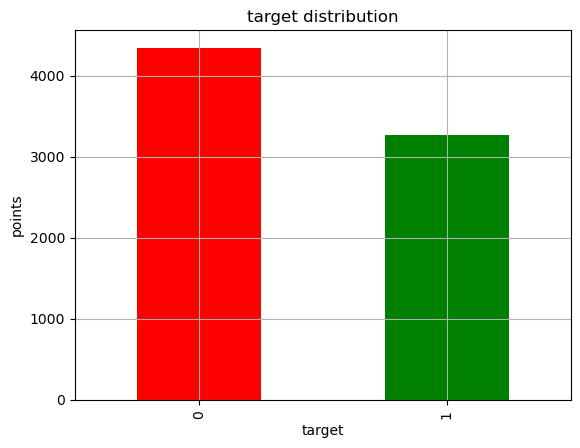

In [11]:
target_distribution = df_train['target'].value_counts().sort_index()
my_colors = ['r', 'g']
target_distribution.plot(kind='bar',color=my_colors)
plt.xlabel('target')
plt.ylabel('points')
plt.title('target distribution')
plt.grid()
plt.show()

In [12]:
df_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<b> Observation </b>
<li>There are 4342 instances where the target is 0</li>
<li>There are 3271 instances where the target is 1</li>
<li>The data looks balanced</li>


Shifting my focus to Check if there are any duplicates in the df_train dataframe.

<b> Checking for duplicates </b>

In [13]:
duplicate = df_train[df_train.duplicated('text')]
duplicate

,id,keyword,location,text,target
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
115,165,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
119,172,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
164,238,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1
624,898,bioterrorism,NaN,To fight bioterrorism sir.,0
...,...,...,...,...,...
7600,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt:...,1
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


<b>Observation</b>
<p>There are 110 rows which are duplicates, but removing them would not be the right thing to do. As this could be from different user wanting the same help from different places. Example  In case of an earthquake ,two people may require debris clearing assistance from same place in nearby region </p>

In [14]:
print(df_train['keyword'].value_counts())

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64


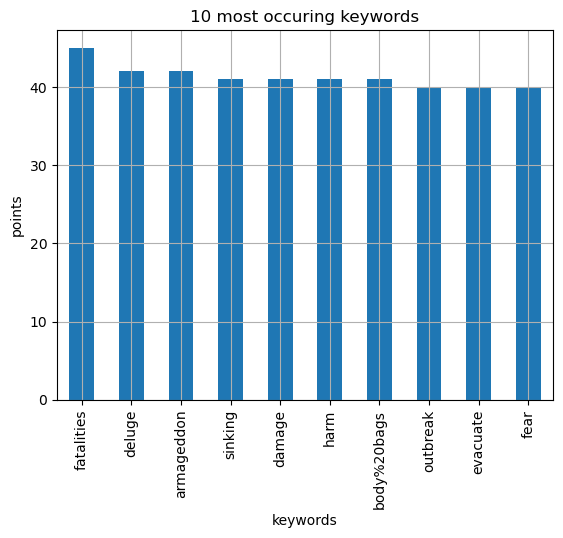

In [15]:
target_distribution = df_train['keyword'].value_counts()[:10]

target_distribution.plot(kind='bar')
plt.xlabel('keywords')
plt.ylabel('points')
plt.title('10 most occuring keywords')
plt.grid()
plt.show()

<b>10 Least occuring key words </b>

In [16]:
 df_train['keyword'].value_counts()[-10:]

volcano                  27
battle                   26
bush%20fires             25
war%20zone               24
rescue                   22
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, dtype: int64

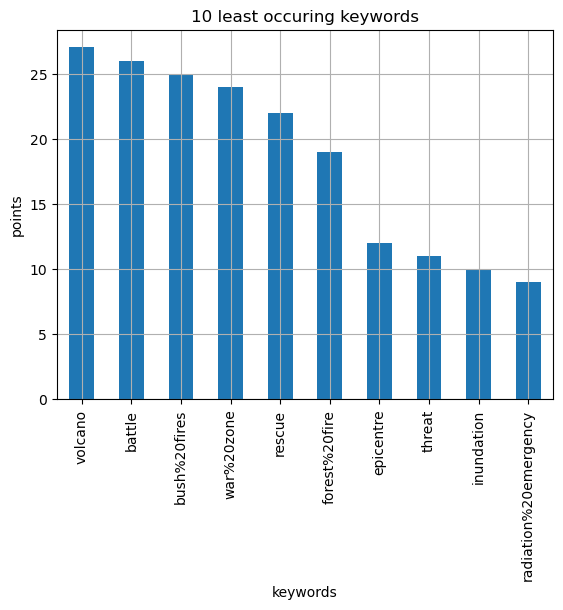

In [17]:
target_distribution = df_train['keyword'].value_counts()[-10:]

target_distribution.plot(kind='bar')
plt.xlabel('keywords')
plt.ylabel('points')
plt.title('10 least occuring keywords')
plt.grid()
plt.show()

<b>Observation </b>
<li>There are 221 keywords</li>
<li>"Fatalities" is the most used keyword , followed by "deluge" and "armageddon"</li>

In [18]:
df_train.groupby('keyword')['target'].value_counts()

keyword     target
ablaze      0         23
            1         13
accident    1         24
            0         11
aftershock  0         34
                      ..
wreck       0         30
            1          7
wreckage    1         39
wrecked     0         36
            1          3
Name: target, Length: 438, dtype: int64

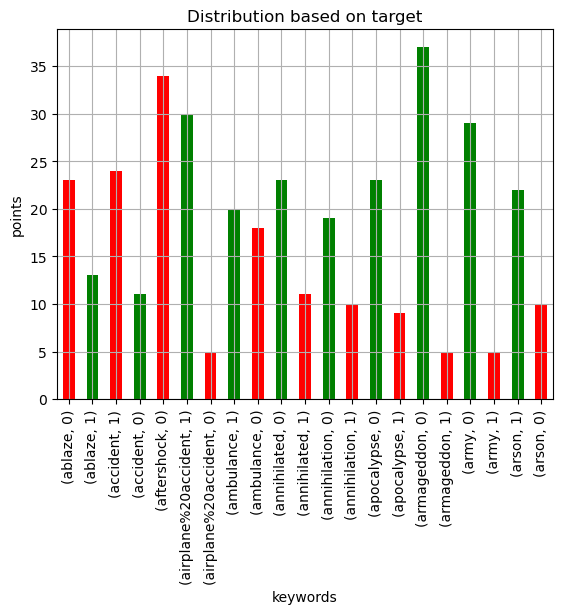

In [19]:
target_distribution = df_train.groupby('keyword')['target'].value_counts()[:21]
my_colors = ['r', 'g']
target_distribution.plot(kind='bar' ,color=my_colors)
plt.xlabel('keywords')
plt.ylabel('points')
plt.title('Distribution based on target')
plt.grid()
plt.show()

<b> Analysing words in Real disaster tweets only</b>

In [20]:
true_df = df_train.loc[df_train['target'] == 1].copy()

In [21]:
true_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [22]:
true_df['keyword'].value_counts()[-10:]

blew%20up      2
inundation     2
threat         2
screaming      2
body%20bags    1
blazing        1
epicentre      1
body%20bag     1
electrocute    1
ruin           1
Name: keyword, dtype: int64

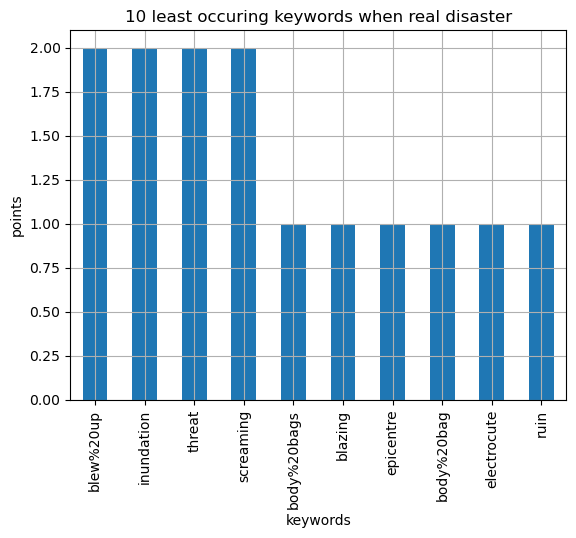

In [23]:
target_distribution = true_df['keyword'].value_counts()[-10:]

target_distribution.plot(kind='bar')
plt.xlabel('keywords')
plt.ylabel('points')
plt.title('10 least occuring keywords when real disaster')
plt.grid()
plt.show()

In [24]:
true_df['keyword'].value_counts()[:10]

derailment           39
wreckage             39
outbreak             39
debris               37
oil%20spill          37
typhoon              37
evacuated            32
suicide%20bombing    32
rescuers             32
suicide%20bomb       32
Name: keyword, dtype: int64

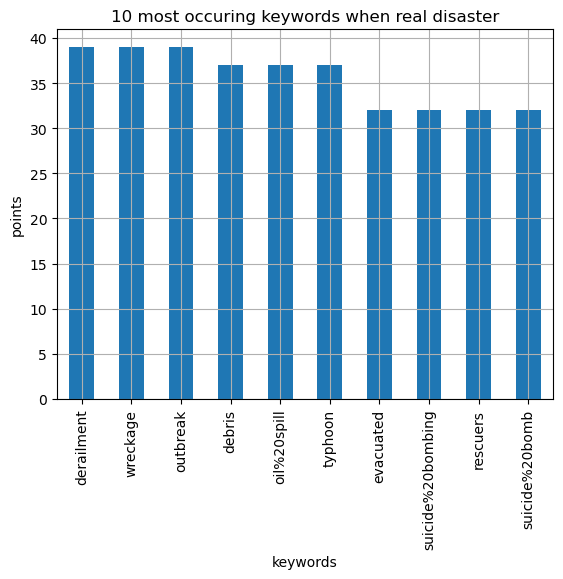

In [25]:
target_distribution = true_df['keyword'].value_counts()[:10]

target_distribution.plot(kind='bar')
plt.xlabel('keywords')
plt.ylabel('points')
plt.title('10 most occuring keywords when real disaster')
plt.grid()
plt.show()

<b> Analysing words in Hoax disaster tweets only</b>

In [26]:
hoax_df = df_train.loc[df_train['target'] == 0].copy()
hoax_df

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,NaN,Sirens everywhere!,0


In [27]:
hoax_df['keyword'].value_counts()[-10:]

forest%20fire         4
suicide%20bomb        3
rescuers              3
nuclear%20disaster    3
bombing               2
typhoon               1
suicide%20bombing     1
suicide%20bomber      1
outbreak              1
oil%20spill           1
Name: keyword, dtype: int64

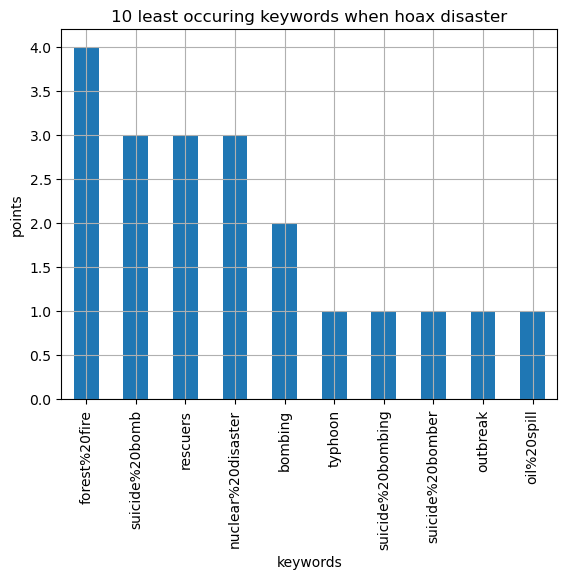

In [28]:
target_distribution = hoax_df['keyword'].value_counts()[-10:]

target_distribution.plot(kind='bar')
plt.xlabel('keywords')
plt.ylabel('points')
plt.title('10 least occuring keywords when hoax disaster')
plt.grid()
plt.show()

In [29]:
hoax_df['keyword'].value_counts()[:10]

body%20bags    40
harm           37
armageddon     37
wrecked        36
ruin           36
deluge         36
explode        35
twister        35
fear           35
siren          35
Name: keyword, dtype: int64

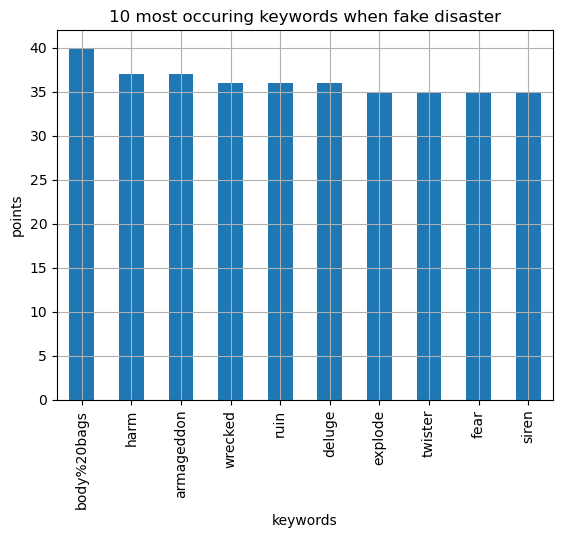

In [30]:
target_distribution = hoax_df['keyword'].value_counts()[:10]

target_distribution.plot(kind='bar')
plt.xlabel('keywords')
plt.ylabel('points')
plt.title('10 most occuring keywords when fake disaster')
plt.grid()
plt.show()

<b> Analysis on Word Count </b>

In [31]:
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))

In [32]:
df_train

,id,keyword,location,text,target,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,19


In [33]:
df_train["word_count"].mean()

14.903585971364771

<b> Observation : </b>The mean overall word count is 14.903

In [34]:
hoax_df['word_count'] = hoax_df['text'].apply(lambda x: len(str(x).split()))
hoax_df["word_count"].mean()

14.704744357438969

<b> Observation : </b>The mean hoax disaster word count is 14.704

In [35]:
true_df['word_count'] = true_df['text'].apply(lambda x: len(str(x).split()))
true_df["word_count"].mean()

15.167532864567411

In [36]:
true_df["word_count"].max()

30

<b> Observation : </b>The mean True disaster word count is 15.167

<b>Conclusion on Word count mean :</b> Since the word count of overall, true and hoax disaster tweets are around 15, nothing can be said about it.

<b> Source:==> </b>Word cloud from Quora question pair similarity assignment

In [37]:
from wordcloud import WordCloud

In [38]:
words = df_train["text"].values

Word Cloud Total text


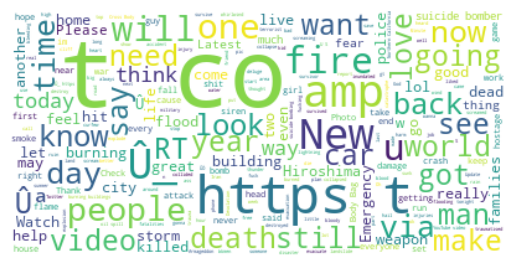

In [39]:
wc = WordCloud(background_color="white", max_words=len(words))
wc.generate(" ".join(words))
print ("Word Cloud Total text")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud True disaster text


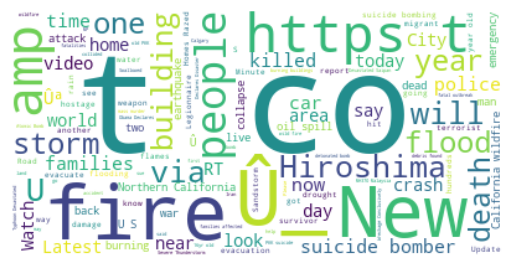

In [40]:
words = true_df["text"].values
wc = WordCloud(background_color="white", max_words=len(words))
wc.generate(" ".join(words))
print ("Word Cloud True disaster text")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud hoax disaster text


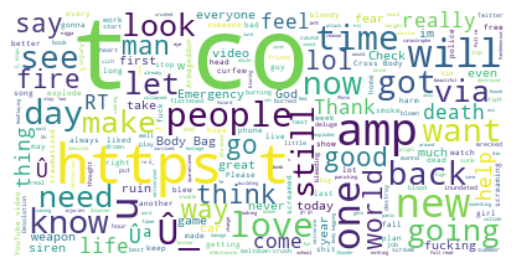

In [41]:
words = hoax_df["text"].values
wc = WordCloud(background_color="white", max_words=len(words))
wc.generate(" ".join(words))
print ("Word Cloud hoax disaster text")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<b> Observation </b>
In all the three word cloud certain words like "https" , "co", "U^" and "t" are seen as some of the most occuring words. This means we will have to clean the data of https and and html tags etc during data cleaning

<b> Removing Stop words and then checking the top words </b>

In [42]:
from wordcloud import STOPWORDS

Word Cloud Total text


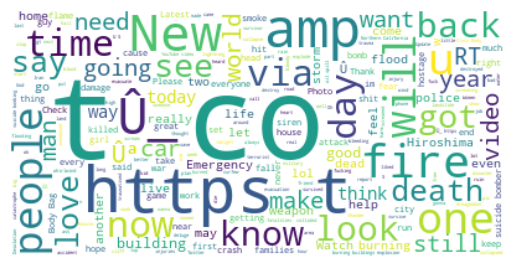

In [43]:
stopwords = set(STOPWORDS)
words = df_train["text"].values
wc = WordCloud(background_color="white",stopwords = stopwords, max_words=len(words))
wc.generate(" ".join(words))
print ("Word Cloud Total text")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud True disaster text


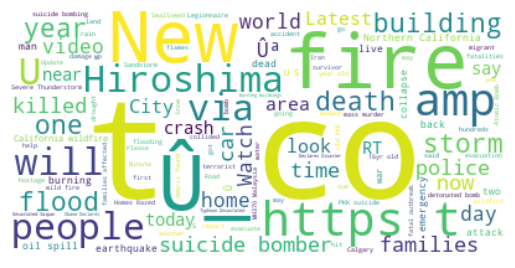

In [44]:
words = true_df["text"].values
wc = WordCloud(background_color="white",stopwords = stopwords, max_words=len(words))
wc.generate(" ".join(words))
print ("Word Cloud True disaster text")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud hoax disaster text


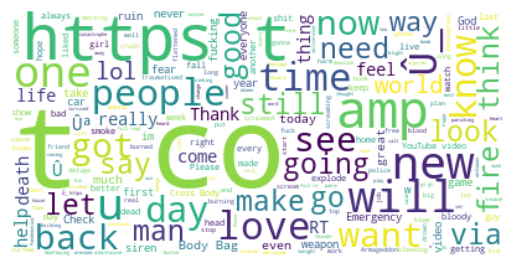

In [45]:
words = hoax_df["text"].values
wc = WordCloud(background_color="white",stopwords = stopwords, max_words=len(words))
wc.generate(" ".join(words))
print ("Word Cloud hoax disaster text")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<b> Observation </b>

<li> Some basic stop words are removed but words like co, https are still present and will require cleaning </li>

# Data-Preprocessing

First I will handle the null values in location and keywords.

Source :==>> https://medium.com/geekculture/dealing-with-null-values-in-pandas-dataframe-1a67854fe834#:~:text=Most%20commonly%20used%20function%20on,where%20all%20values%20are%20NaN%20.

In [46]:
df_train_2 = df_train.copy()

In [47]:
df_train_2['keyword'] = df_train_2['keyword'].fillna('nokeyword')
df_train_2.head()

,id,keyword,location,text,target,word_count
0,1,nokeyword,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,nokeyword,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,nokeyword,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,nokeyword,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,nokeyword,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16


In [48]:
df_train_2['location'] = df_train_2['location'].fillna('nolocation')
df_train_2.head()

,id,keyword,location,text,target,word_count
0,1,nokeyword,nolocation,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,nokeyword,nolocation,Forest fire near La Ronge Sask. Canada,1,7
2,5,nokeyword,nolocation,All residents asked to 'shelter in place' are ...,1,22
3,6,nokeyword,nolocation,"13,000 people receive #wildfires evacuation or...",1,8
4,7,nokeyword,nolocation,Just got sent this photo from Ruby #Alaska as ...,1,16


In [49]:
df_train_2.tail()

,id,keyword,location,text,target,word_count
7608,10869,nokeyword,nolocation,Two giant cranes holding a bridge collapse int...,1,11
7609,10870,nokeyword,nolocation,@aria_ahrary @TheTawniest The out of control w...,1,20
7610,10871,nokeyword,nolocation,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8
7611,10872,nokeyword,nolocation,Police investigating after an e-bike collided ...,1,19
7612,10873,nokeyword,nolocation,The Latest: More Homes Razed by Northern Calif...,1,13


<b> The null location have been filled, so we can avoid null errors later if we decide to use the respective columns </b>

<b> Expanding English language contractions in Python </b>

Source :== >>https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

In [50]:
import re

def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"\'I'm", "I am", phrase)
    phrase = re.sub(r"I\'ve", "I have", phrase)
    phrase = re.sub(r"isn\'t", "is not", phrase)
    phrase = re.sub(r"we\'ll", "we will", phrase)
    phrase = re.sub(r"we\'re", "we are", phrase)
    phrase = re.sub(r"we\'ve", "we have", phrase)
    phrase = re.sub(r"weren\'t", "were not", phrase)
    phrase = re.sub(r"quake", "earthquake", phrase)
    phrase = re.sub(r"nado", "tornado", phrase)
    return phrase


<b> Data Preprocessing steps </b>
<li> Remove html tags what were seen in word cloud Source :==>> https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element </li>
<li> Remove special charecters Source :==>> #remove special character: https://stackoverflow.com/a/5843547/4084039 </li>
<li> Remove words with numbers in text Source :==>> #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039 </li>
<li> Remove the stop words using wordcloud stopwords </li>
<li> Converting all the letters in lowercase so tokenizer does not think they are to different words </li>
<li> Source :==>> Applied AI Amazon fine food reviews Case studies </li>

In [51]:
from bs4 import BeautifulSoup
from tqdm import tqdm
preprocessed_tweets = []
for sentance in tqdm(df_train_2['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_tweets.append(sentance.strip())

  0%|                                                                                         | 0/7613 [00:00<?, ?it/s]C:\Users\ADMIN\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████| 7613/7613 [00:02<00:00, 3377.34it/s]


In [52]:
print(len(preprocessed_tweets))
preprocessed_tweets[1]

7613


'forest fire near la ronge sask canada'

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
Y = df_train_2['target'].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_tweets, Y, stratify=df_train_2['target'], test_size=0.20) 

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
import warnings
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import math

<b> Using basic bow countvectorizer for baseline model </b>

In [57]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train) 
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)
train_auc = []

In [58]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_mean=False)
X_train_bow = scalar.fit_transform(X_train_bow)
X_test_bow= scalar.transform(X_test_bow)

### Baseline Model : Naive Bayes

<li> For text classification problems like spam detection Naive Bayes is used as a baseline model and benchmark </li>
<li> Naive Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. </li>

<b> P(A|B) = (P(B|A)P(A))/P(B) <b>
<li>P(A|B) is Posterior probability</li>
<li>P(B|A) is Likelihood probability</li>
<li>P(A) and P(B) are the probabilities of observing A and B respectively without any given conditions</li>

In [58]:
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

mnb = MultinomialNB(class_prior= [0.5,0.5])
clf = GridSearchCV(mnb, parameters, cv=3, scoring='roc_auc')
clf.fit(X_train_bow, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=[0.5, 0.5],
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [59]:
print(clf.best_estimator_)

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)


In [60]:
best_alpha_values = 1
mnb = MultinomialNB(alpha = best_alpha_values,class_prior= [0.5,0.5])
mnb.fit(X_train_bow, y_train)

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)

In [61]:
ypred = mnb.predict(X_test_bow)

In [62]:
ypred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [63]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

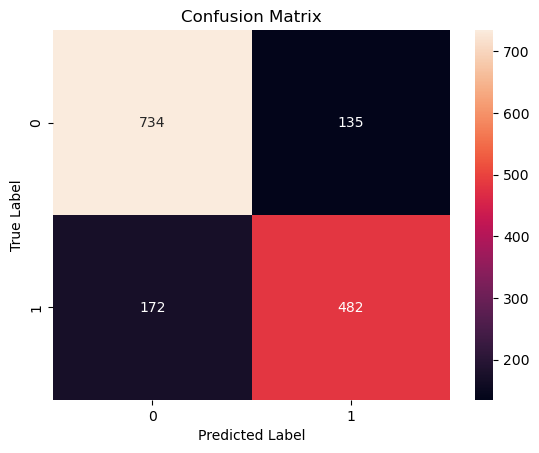

In [64]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [65]:
f1_score(y_test, ypred)

0.7584579071597167

In [66]:
from sklearn.metrics import roc_auc_score


<b> Observation : With the baseline NAIVE BAYES model we get an F1 SCORE of 0.7261 </b>

<b> LOGISTIC REGRESSION </b>

<li> Logistic regression is a classification algorithm that is used for building machine learning models </li>
<li> Logistic regression is best used when the data is linearly separable </li>
<li> The latency for logistic regression is very low </li>

<b> Using L1 regularization </b>

In [116]:
from sklearn.linear_model import LogisticRegression


In [117]:
C=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

clf = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)

clf.fit(X_train_bow, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [118]:
print(clf.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [119]:
lor=LogisticRegression(penalty='l1',C=1,solver='liblinear')
lor.fit(X_train_bow, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
ypred = lor.predict(X_test_bow)

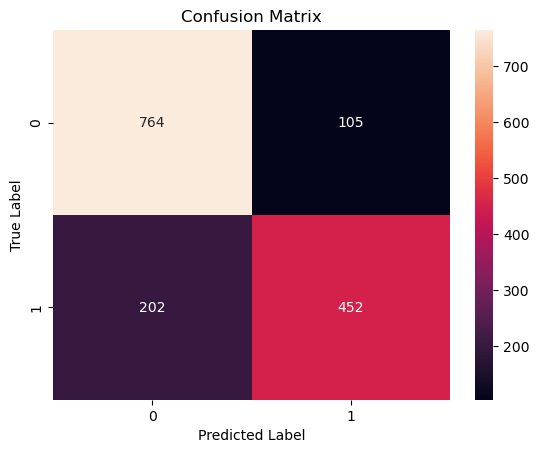

In [121]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [122]:
f1_score(y_test, ypred)

0.7464905037159372

In [123]:
warnings.filterwarnings("ignore")

<b> Using L2 regluarization </b>

In [130]:
C=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

clf = GridSearchCV(LogisticRegression(penalty='l2'), tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
clf.fit(X_train_bow, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [131]:
print(clf.best_estimator_)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [132]:
lor=LogisticRegression(penalty='l2',C=0.0001)
lor.fit(X_train_bow, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
ypred = lor.predict(X_test_bow)

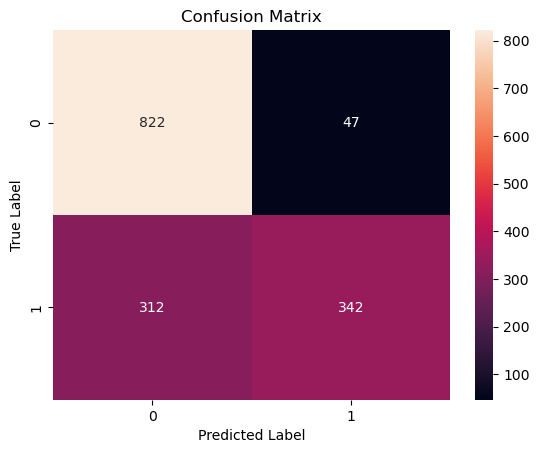

0.6558005752636625


In [134]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print(f1_score(y_test, ypred))

### SVM

<li>Support Vector Machine or SVM is an algorithms, which is used for Classification as well as Regression problems.</li>
<li>The SVM algorithm tries to create the best line or boundary that can separate a space into classes </li>
<li> This line is called hyperplane </li>
<li> As per wikipaedia, SVMs are helpful in text and hypertext categorization, as their application can significantly reduce the need for labeled training instances in both the standard inductive and transductive settings. </li>

In [135]:
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier

In [136]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)
train_auc = []

In [137]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_mean=False)
X_train_bow = scalar.fit_transform(X_train_bow)
X_test_bow= scalar.transform(X_test_bow)

In [138]:
alpha=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters = [{'alpha': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
clf = GridSearchCV(SGDClassifier(loss='hinge'), tuned_parameters, scoring = 'roc_auc', cv=3,return_train_score=True)
clf.fit(X_train_bow, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [139]:
print(clf.best_estimator_)

SGDClassifier(alpha=100, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [140]:
from sklearn.metrics import roc_curve, auc
sg=SGDClassifier(alpha=100,loss='hinge')
sgd =sg.fit(X_train_bow, y_train)


In [141]:
ypred = sgd.predict(X_test_bow)

In [142]:
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

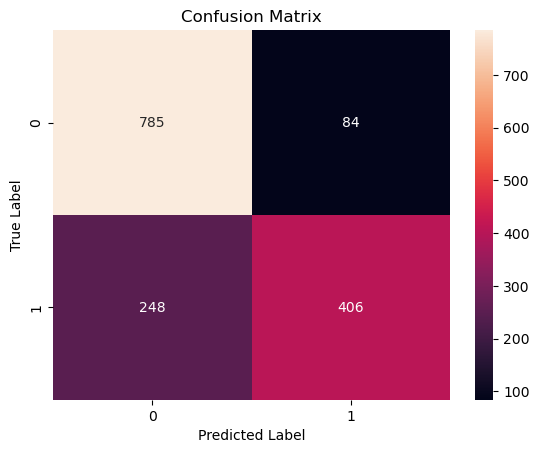

In [143]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [144]:
f1_score(y_test, ypred)

0.7097902097902098

### TFIDF VECTORIZER

<li>TF-IDF stands for term frequency-inverse document frequency.</li>
<li>Term frequency is the frequency of a particular word occuring in the document.</li>
<li>Inverse document frequency looks at how common or uncommon a word is amongst the corpus.</li>
<li>The higher the TF-IDF score the more important or relevant the word is.</li>

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [178]:
Y = df_train_2['target'].values
X = preprocessed_tweets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_tweets, Y, stratify=df_train_2['target'], test_size=0.20)

In [147]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [148]:
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Naive Bayes with TFIDF

In [149]:
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

mnb = MultinomialNB(class_prior= [0.5,0.5])
clf = GridSearchCV(mnb, parameters, cv=3, scoring='roc_auc')
clf.fit(X_train_tfidf, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=[0.5, 0.5],
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [150]:
print(clf.best_estimator_)

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)


In [151]:
best_alpha_values = 1
mnb = MultinomialNB(alpha = best_alpha_values,class_prior= [0.5,0.5])
mnb.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)

In [152]:
ypred = mnb.predict(X_test_tfidf)

In [153]:
ypred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [154]:
ypred.shape

(1523,)

In [155]:
y_test.shape

(1523,)

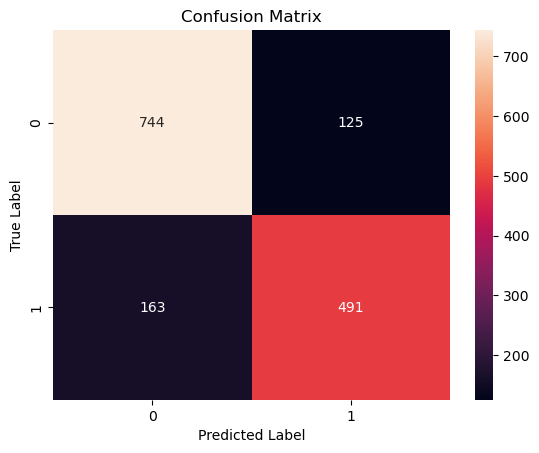

In [156]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [157]:
f1_score(y_test, ypred)

0.7732283464566929

LOGISTIC REGRESSION and TFIDF vectorizer

Using l1 regularization

In [158]:
C=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

clf = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)

clf.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [159]:
print(clf.best_estimator_)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [160]:
lor=LogisticRegression(penalty='l1',C=100,solver='liblinear')
lor.fit(X_train_tfidf, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
ypred = lor.predict(X_test_tfidf)

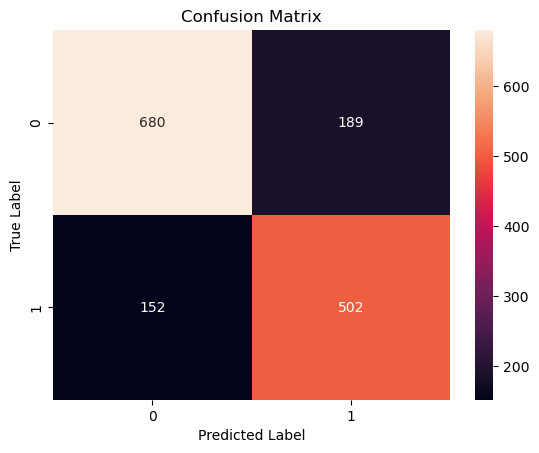

In [162]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [163]:
f1_score(y_test, ypred)

0.7464684014869888

### Using l2 regluarization

In [179]:
scalar = StandardScaler(with_mean=False)
X_train_tfidf = scalar.fit_transform(X_train_tfidf)
X_test_tfidf= scalar.transform(X_test_tfidf)

In [165]:
C=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

clf = GridSearchCV(LogisticRegression(penalty='l2'), tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
clf.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [166]:
print(clf.best_estimator_)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [167]:
lor=LogisticRegression(penalty='l2',C=0.0001)
lor.fit(X_train_tfidf, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
ypred = lor.predict(X_test_tfidf)

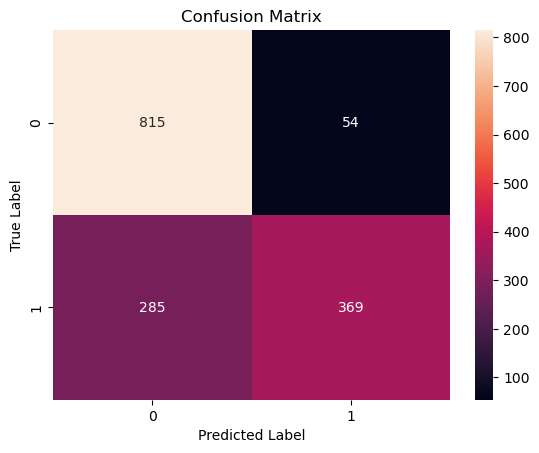

In [169]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [170]:
f1_score(y_test, ypred)

0.6852367688022285

### SVM WITH TFIDF

In [186]:
alpha=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters = [{'alpha': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
clf = GridSearchCV(SGDClassifier(loss='hinge'), tuned_parameters, scoring = 'roc_auc', cv=3,return_train_score=True)
clf.fit(X_train_tfidf, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [187]:
print(clf.best_estimator_)

SGDClassifier(alpha=10000, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [189]:
sg=SGDClassifier(alpha=10000,loss='hinge')
sgd =sg.fit(X_train_tfidf, y_train)

In [190]:
ypred = sgd.predict(X_test_tfidf)

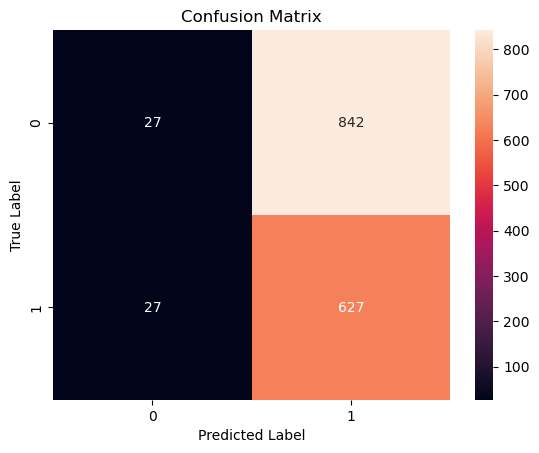

In [191]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [192]:
f1_score(y_test, ypred)

0.5906735751295337

In [1]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Algorthim", "F1-Score"]
x.add_row(["BOW","Naive Bayes",0.7373])
x.add_row(["BOW","Logistic Regression L1",0.7464])
x.add_row(["BOW","Logistic Regression L2",0.6558])
x.add_row(["BOW","SVM",0.7097])
x.add_row(["TFIDF","Naive Bayes",0.7732])
x.add_row(["TFIDF","Logistic Regression L1",0.7464])
x.add_row(["TFIDF","Logistic Regression L2",0.6852])
x.add_row(["TFIDF","SVM",0.5906])
print(x)

+------------+------------------------+----------+
| Vectorizer |       Algorthim        | F1-Score |
+------------+------------------------+----------+
|    BOW     |      Naive Bayes       |  0.7373  |
|    BOW     | Logistic Regression L1 |  0.7464  |
|    BOW     | Logistic Regression L2 |  0.6558  |
|    BOW     |          SVM           |  0.7097  |
|   TFIDF    |      Naive Bayes       |  0.7732  |
|   TFIDF    | Logistic Regression L1 |  0.7464  |
|   TFIDF    | Logistic Regression L2 |  0.6852  |
|   TFIDF    |          SVM           |  0.5906  |
+------------+------------------------+----------+


### LSTM

LSTM stands for Long Short Term Memory. Lstm is a part of Deep learning Neaural Networks.It help with the problem of long-term dependencies of RNN where it does not give good results for words or events that happened waay before speaking from a timeseries point of view, but can give good results for recent data. As the gap length increases RNN does not give an efficient performance. LSTM retains the information for a long period of time. LSTM networks are capable of learning long-term dependencies in sequential data, which makes them very good in text classification. Hence we use them.

In [86]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input,Dense,LSTM
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [67]:
tokenizer_tweet = Tokenizer()

In [68]:
tokenizer_tweet.fit_on_texts(preprocessed_tweets)

In [69]:
tweet_tokenlen = len(tokenizer_tweet.word_index)+1

In [70]:
tweet_tokenlen

15615

In [71]:
tokenizer_tweet.word_index

{'will': 1,
 'fire': 2,
 'new': 3,
 'now': 4,
 'via': 5,
 's': 6,
 'people': 7,
 'news': 8,
 'one': 9,
 'video': 10,
 'disaster': 11,
 'emergency': 12,
 'police': 13,
 'u': 14,
 'body': 15,
 'still': 16,
 'us': 17,
 'california': 18,
 'storm': 19,
 'burning': 20,
 'crash': 21,
 'back': 22,
 'time': 23,
 'man': 24,
 'day': 25,
 'suicide': 26,
 'got': 27,
 'know': 28,
 'rt': 29,
 'buildings': 30,
 'first': 31,
 'world': 32,
 'see': 33,
 'bomb': 34,
 'going': 35,
 'nuclear': 36,
 'two': 37,
 'love': 38,
 'fires': 39,
 'attack': 40,
 'today': 41,
 'killed': 42,
 'youtube': 43,
 'dead': 44,
 'go': 45,
 'full': 46,
 'car': 47,
 'train': 48,
 'life': 49,
 'war': 50,
 'hiroshima': 51,
 'let': 52,
 'accident': 53,
 'good': 54,
 'may': 55,
 'families': 56,
 'say': 57,
 'think': 58,
 'watch': 59,
 'many': 60,
 'last': 61,
 'home': 62,
 'way': 63,
 'want': 64,
 'years': 65,
 'make': 66,
 'w': 67,
 'collapse': 68,
 'best': 69,
 'death': 70,
 'work': 71,
 'help': 72,
 'look': 73,
 'please': 74,
 'ev

In [72]:
tweet_token_text  = tokenizer_tweet.texts_to_sequences(preprocessed_tweets)


In [73]:
tweet_token_text

[[4211, 702, 173, 55, 1421, 4212, 17],
 [91, 2, 128, 616, 6272, 6273, 1038],
 [1542, 1422, 6274, 546, 6275, 1543, 146, 1926, 546, 1212, 933],
 [7, 4213, 1304, 146, 1212, 18],
 [27, 1039, 206, 6276, 1544, 157, 1304, 6277, 88],
 [2641, 261, 18, 1305, 703, 6278, 441, 979, 284, 2, 4214, 1304],
 [115, 11, 673, 166, 1040, 674, 147, 1545, 6279, 873, 2203, 1306],
 [129, 1718, 33, 2, 4215],
 [12, 146, 1130, 4, 465, 704, 592],
 [2204, 353, 140, 152],
 [442, 7, 504, 158, 328, 505],
 [705,
  423,
  2642,
  123,
  2643,
  3249,
  547,
  567,
  102,
  423,
  2642,
  207,
  207,
  6280,
  147],
 [2644, 147, 1423, 6281, 2642, 489, 568, 3250],
 [115, 4216, 743, 1424, 4216],
 [131, 88, 303, 2645, 47, 21, 248],
 [24],
 [38, 4217],
 [208, 1546],
 [47, 646],
 [6282],
 [2646],
 [874, 424],
 [38, 6283],
 [2205, 25],
 [6284],
 [63, 1719, 124],
 [1131, 61, 249],
 [38, 1927],
 [6285],
 [4218],
 [209],
 [6286, 2647, 1720, 490],
 [174, 744, 820, 673, 1041, 29],
 [6287, 248, 8, 2206, 675, 159, 490, 980],
 [1425, 1

In [74]:
X_pad = pad_sequences(tweet_token_text, maxlen=35 , padding='post' )


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, Y, stratify=df_train_2['target'], test_size=0.20) 

In [87]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Conv1D, Conv2D
from keras.layers import MaxPooling1D, GlobalMaxPooling1D ,MaxPooling2D
from keras.layers import Dense, Input , Dropout, Flatten


In [88]:
import h5py
from tensorflow.python.keras.callbacks import TensorBoard,ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from time import time

### Lstm Model 1

In [84]:
filepath="weights1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_1".format(time()))
callbacks_1 = [checkpoint,tensorboard_callback]

In [85]:
embedding_vecor_length = 32
model1 = Sequential()
model1.add(Embedding(tweet_tokenlen, embedding_vecor_length, input_length=35))
model1.add(LSTM(100))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 35, 32)            499680    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 552,981
Trainable params: 552,981
Non-trainable params: 0
_________________________________________________________________
None


In [86]:
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_1 = model1.fit(X_train,
          y_train,
          batch_size=64,
          validation_data=(X_test, y_test),
          epochs=15,callbacks=[callbacks_1])

Epoch 1/15
95/96 [============================>.] - ETA: 0s - loss: 0.6848 - accuracy: 0.5673
Epoch 00001: val_accuracy improved from -inf to 0.57058, saving model to weights1.hdf5
96/96 [==============================] - 8s 58ms/step - loss: 0.6848 - accuracy: 0.5673 - val_loss: 0.6831 - val_accuracy: 0.5706
Epoch 2/15
95/96 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.7306
Epoch 00002: val_accuracy improved from 0.57058 to 0.79777, saving model to weights1.hdf5
96/96 [==============================] - 5s 51ms/step - loss: 0.5311 - accuracy: 0.7309 - val_loss: 0.4871 - val_accuracy: 0.7978
Epoch 3/15
95/96 [============================>.] - ETA: 0s - loss: 0.2810 - accuracy: 0.8987
Epoch 00003: val_accuracy did not improve from 0.79777
96/96 [==============================] - 5s 47ms/step - loss: 0.2808 - accuracy: 0.8989 - val_loss: 0.5068 - val_accuracy: 0.7820
Epoch 4/15
95/96 [============================>.] - ETA: 0s - loss: 0.1696 - accuracy: 0.9441
Ep

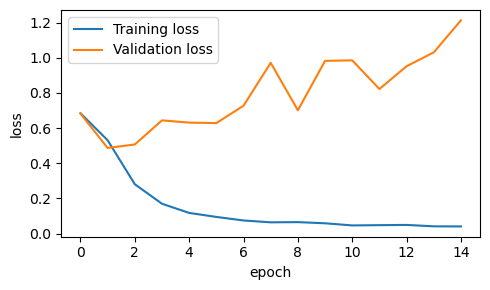

In [96]:
model_loss = pd.DataFrame(history_1.history)
model_loss['epoch'] = history_1.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["loss"], 
        label="Training loss")
ax.plot(np.arange(0, num_epochs), model_loss["val_loss"], 
        label="Validation loss")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.tight_layout()
plt.show()

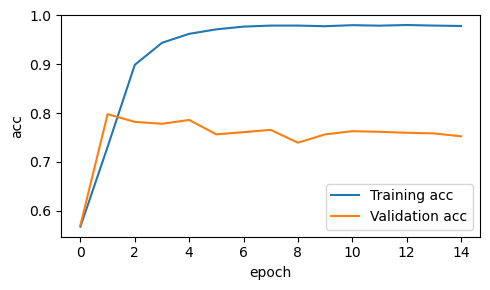

In [97]:
model_loss = pd.DataFrame(history_1.history)
model_loss['epoch'] = history_1.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["accuracy"], 
        label="Training acc")
ax.plot(np.arange(0, num_epochs), model_loss["val_accuracy"], 
        label="Validation acc")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.tight_layout()
plt.show()

In [94]:
model1.load_weights("weights1.hdf5")
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [95]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 79.78%


### Lstm Model 2

In [98]:
filepath="weights3.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_3".format(time()))
callbacks_1 = [checkpoint,tensorboard_callback]

In [99]:
embedding_vecor_length = 32
model2 = Sequential()
model2.add(Embedding(tweet_tokenlen, embedding_vecor_length, input_length=35))
model2.add(LSTM(108,return_sequences=True))
model2.add(Dropout(0.5))
model2.add(LSTM(64))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='relu'))
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 35, 32)            499680    
                                                                 
 lstm_2 (LSTM)               (None, 35, 108)           60912     
                                                                 
 dropout (Dropout)           (None, 35, 108)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                44288     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 604,945
Trainable params: 604,945
Non-tr

In [100]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_2 = model2.fit(X_train,
          y_train,
          batch_size=64,
          validation_data=(X_test, y_test),
          epochs=15,callbacks=[callbacks_1])

Epoch 1/15
95/96 [============================>.] - ETA: 0s - loss: 0.7642 - accuracy: 0.5487
Epoch 00001: val_accuracy improved from -inf to 0.57058, saving model to weights3.hdf5
96/96 [==============================] - 13s 95ms/step - loss: 0.7641 - accuracy: 0.5486 - val_loss: 0.6802 - val_accuracy: 0.5706
Epoch 2/15
95/96 [============================>.] - ETA: 0s - loss: 0.6849 - accuracy: 0.6441
Epoch 00002: val_accuracy improved from 0.57058 to 0.79974, saving model to weights3.hdf5
96/96 [==============================] - 9s 94ms/step - loss: 0.6844 - accuracy: 0.6445 - val_loss: 0.7906 - val_accuracy: 0.7997
Epoch 3/15
95/96 [============================>.] - ETA: 0s - loss: 0.5004 - accuracy: 0.8599
Epoch 00003: val_accuracy did not improve from 0.79974
96/96 [==============================] - 9s 96ms/step - loss: 0.4997 - accuracy: 0.8601 - val_loss: 0.8167 - val_accuracy: 0.7912
Epoch 4/15
95/96 [============================>.] - ETA: 0s - loss: 0.4813 - accuracy: 0.9086
E

In [101]:
model2.load_weights("weights3.hdf5")
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [102]:
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 79.97%


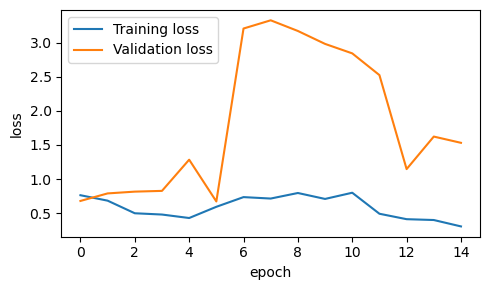

In [103]:
model_loss = pd.DataFrame(history_2.history)
model_loss['epoch'] = history_2.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["loss"], 
        label="Training loss")
ax.plot(np.arange(0, num_epochs), model_loss["val_loss"], 
        label="Validation loss")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.tight_layout()
plt.show()

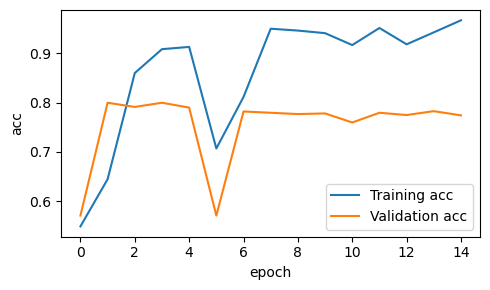

In [104]:
model_loss = pd.DataFrame(history_2.history)
model_loss['epoch'] = history_2.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["accuracy"], 
        label="Training acc")
ax.plot(np.arange(0, num_epochs), model_loss["val_accuracy"], 
        label="Validation acc")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.tight_layout()
plt.show()

### Lstm Model 3

In [105]:
filepath="weights4.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_4".format(time()))
callbacks_1 = [checkpoint,tensorboard_callback]

In [106]:
embedding_vecor_length = 32
model3 = Sequential()
model3.add(Embedding(tweet_tokenlen, embedding_vecor_length, input_length=35))
model3.add(LSTM(108,return_sequences=True))
model3.add(Dropout(0.5))
model3.add(LSTM(64,return_sequences=True))
model3.add(Dropout(0.5))
model3.add(LSTM(32))
model3.add(Dropout(0.3))
model3.add(Dense(1, activation='relu'))
print(model3.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 35, 32)            499680    
                                                                 
 lstm_4 (LSTM)               (None, 35, 108)           60912     
                                                                 
 dropout_2 (Dropout)         (None, 35, 108)           0         
                                                                 
 lstm_5 (LSTM)               (None, 35, 64)            44288     
                                                                 
 dropout_3 (Dropout)         (None, 35, 64)            0         
                                                                 
 lstm_6 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_4 (Dropout)         (None, 32)               

In [107]:
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_3 =model3.fit(X_train,
          y_train,
          batch_size=64,
          validation_data=(X_test, y_test),
          epochs=15,callbacks=[callbacks_1])

Epoch 1/15
95/96 [============================>.] - ETA: 0s - loss: 0.7461 - accuracy: 0.5480
Epoch 00001: val_accuracy improved from -inf to 0.57058, saving model to weights4.hdf5
96/96 [==============================] - 17s 119ms/step - loss: 0.7461 - accuracy: 0.5478 - val_loss: 0.6805 - val_accuracy: 0.5706
Epoch 2/15
95/96 [============================>.] - ETA: 0s - loss: 0.7290 - accuracy: 0.6396
Epoch 00002: val_accuracy improved from 0.57058 to 0.76691, saving model to weights4.hdf5
96/96 [==============================] - 9s 97ms/step - loss: 0.7281 - accuracy: 0.6401 - val_loss: 1.5236 - val_accuracy: 0.7669
Epoch 3/15
95/96 [============================>.] - ETA: 0s - loss: 0.5359 - accuracy: 0.8403
Epoch 00003: val_accuracy did not improve from 0.76691
96/96 [==============================] - 9s 97ms/step - loss: 0.5362 - accuracy: 0.8396 - val_loss: 0.5761 - val_accuracy: 0.6724
Epoch 4/15
95/96 [============================>.] - ETA: 0s - loss: 0.4466 - accuracy: 0.8913


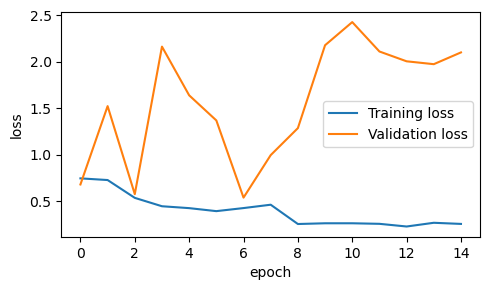

In [108]:
model_loss = pd.DataFrame(history_3.history)
model_loss['epoch'] = history_3.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["loss"], 
        label="Training loss")
ax.plot(np.arange(0, num_epochs), model_loss["val_loss"], 
        label="Validation loss")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.tight_layout()
plt.show()

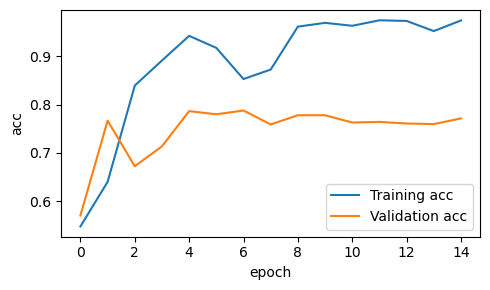

In [109]:
model_loss = pd.DataFrame(history_3.history)
model_loss['epoch'] = history_3.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["accuracy"], 
        label="Training acc")
ax.plot(np.arange(0, num_epochs), model_loss["val_accuracy"], 
        label="Validation acc")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.tight_layout()
plt.show()

In [110]:
model3.load_weights("weights4.hdf5")
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
scores = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 78.79%


### Lstm Model 4

In [78]:
filepath="weights5.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_5".format(time()))
callbacks_1 = [checkpoint,tensorboard_callback]

In [79]:
embedding_vecor_length = 32
model4 = Sequential()
model4.add(Embedding(tweet_tokenlen, embedding_vecor_length, input_length=35))
model4.add(LSTM(108,return_sequences=True))
model4.add(Dropout(0.5))
model4.add(LSTM(64,return_sequences=True))
model4.add(Dropout(0.5))
model4.add(LSTM(32))
model4.add(Dropout(0.3))
model4.add(Dense(1, activation='relu'))
print(model4.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 32)            499680    
                                                                 
 lstm (LSTM)                 (None, 35, 108)           60912     
                                                                 
 dropout (Dropout)           (None, 35, 108)           0         
                                                                 
 lstm_1 (LSTM)               (None, 35, 64)            44288     
                                                                 
 dropout_1 (Dropout)         (None, 35, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [80]:
model4.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
history_4 = model4.fit(X_train,
          y_train,
          batch_size=64,
          validation_data=(X_test, y_test),
          epochs=15,callbacks=[callbacks_1])

Epoch 1/15
95/96 [============================>.] - ETA: 0s - loss: 0.7769 - accuracy: 0.5793
Epoch 00001: val_accuracy improved from -inf to 0.43007, saving model to weights5.hdf5
96/96 [==============================] - 18s 122ms/step - loss: 0.7769 - accuracy: 0.5788 - val_loss: 0.7152 - val_accuracy: 0.4301
Epoch 2/15
95/96 [============================>.] - ETA: 0s - loss: 0.6152 - accuracy: 0.7648
Epoch 00002: val_accuracy improved from 0.43007 to 0.78792, saving model to weights5.hdf5
96/96 [==============================] - 10s 103ms/step - loss: 0.6146 - accuracy: 0.7652 - val_loss: 1.2997 - val_accuracy: 0.7879
Epoch 3/15
95/96 [============================>.] - ETA: 0s - loss: 0.4957 - accuracy: 0.8304
Epoch 00003: val_accuracy improved from 0.78792 to 0.79448, saving model to weights5.hdf5
96/96 [==============================] - 10s 105ms/step - loss: 0.4956 - accuracy: 0.8304 - val_loss: 0.5597 - val_accuracy: 0.7945
Epoch 4/15
96/96 [==============================] - ETA

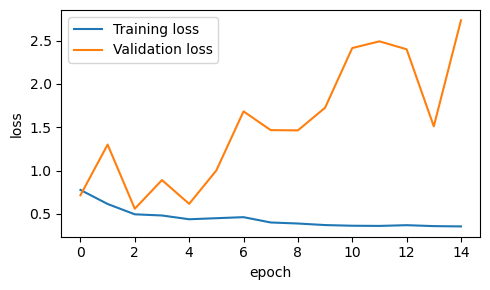

In [81]:
model_loss = pd.DataFrame(history_4.history)
model_loss['epoch'] = history_4.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["loss"], 
        label="Training loss")
ax.plot(np.arange(0, num_epochs), model_loss["val_loss"], 
        label="Validation loss")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.tight_layout()
plt.show()

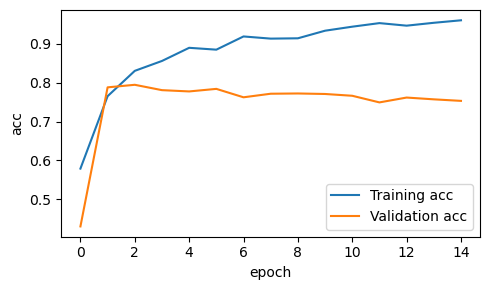

In [82]:
model_loss = pd.DataFrame(history_4.history)
model_loss['epoch'] = history_4.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["accuracy"], 
        label="Training acc")
ax.plot(np.arange(0, num_epochs), model_loss["val_accuracy"], 
        label="Validation acc")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.tight_layout()
plt.show()

In [83]:
model4.load_weights("weights5.hdf5")
model4.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
scores = model4.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 79.45%


### Lstm Model 5

In [84]:
filepath="weights2.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)

In [85]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_2".format(time()))
callbacks_1 = [checkpoint,tensorboard_callback]

In [86]:
embedding_vecor_length = 32
model6 = Sequential()
model6.add(Embedding(tweet_tokenlen, embedding_vecor_length, input_length=35))
model6.add(LSTM(64,return_sequences=True))
model6.add(Dropout(0.7))
model6.add(LSTM(32))
model6.add(Dropout(0.5))
model6.add(Dense(1, activation='relu'))
model6.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
print(model6.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 35, 32)            499680    
                                                                 
 lstm_3 (LSTM)               (None, 35, 64)            24832     
                                                                 
 dropout_3 (Dropout)         (None, 35, 64)            0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 536,961
Trainable params: 536,961
Non-tr

In [87]:
model6.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history_6 = model6.fit(X_train,
          y_train,
          batch_size=64,
          validation_data=(X_test, y_test),
          epochs=20,callbacks=[callbacks_1])

Epoch 1/20
96/96 [==============================] - ETA: 0s - loss: 0.7714 - accuracy: 0.5760
Epoch 00001: val_accuracy improved from -inf to 0.57387, saving model to weights2.hdf5
96/96 [==============================] - 10s 58ms/step - loss: 0.7714 - accuracy: 0.5760 - val_loss: 0.7650 - val_accuracy: 0.5739
Epoch 2/20
95/96 [============================>.] - ETA: 0s - loss: 0.6068 - accuracy: 0.7951
Epoch 00002: val_accuracy improved from 0.57387 to 0.78201, saving model to weights2.hdf5
96/96 [==============================] - 5s 48ms/step - loss: 0.6064 - accuracy: 0.7952 - val_loss: 1.0100 - val_accuracy: 0.7820
Epoch 3/20
95/96 [============================>.] - ETA: 0s - loss: 0.5142 - accuracy: 0.8342
Epoch 00003: val_accuracy improved from 0.78201 to 0.79645, saving model to weights2.hdf5
96/96 [==============================] - 5s 49ms/step - loss: 0.5137 - accuracy: 0.8345 - val_loss: 0.8843 - val_accuracy: 0.7965
Epoch 4/20
95/96 [============================>.] - ETA: 0s 

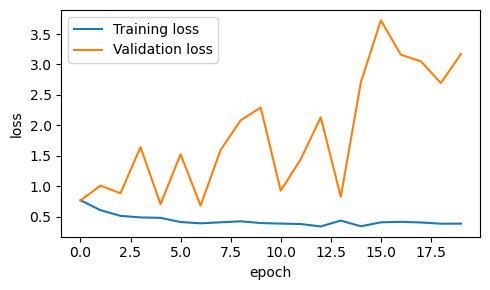

In [88]:
model_loss = pd.DataFrame(history_6.history)
model_loss['epoch'] = history_6.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["loss"], 
        label="Training loss")
ax.plot(np.arange(0, num_epochs), model_loss["val_loss"], 
        label="Validation loss")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.tight_layout()
plt.show()

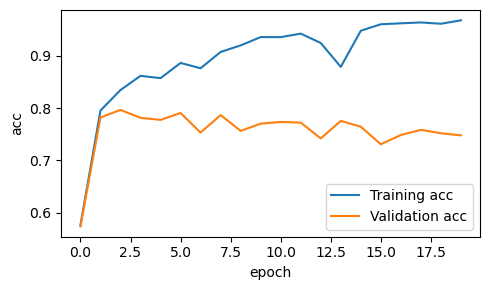

In [89]:
model_loss = pd.DataFrame(history_6.history)
model_loss['epoch'] = history_6.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["accuracy"], 
        label="Training acc")
ax.plot(np.arange(0, num_epochs), model_loss["val_accuracy"], 
        label="Validation acc")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.tight_layout()
plt.show()

In [90]:
model6.load_weights("weights2.hdf5")
model6.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [91]:
scores = model6.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 79.65%


### Glove vector embedding

In [92]:
import pickle 
from numpy import zeros

In [93]:
tokenizer_tweet = Tokenizer()
tokenizer_tweet.fit_on_texts(preprocessed_tweets)
tweet_tokenlen = len(tokenizer_tweet.word_index)+1
tweet_tokenlen

15615

In [94]:
tweet_token_text  = tokenizer_tweet.texts_to_sequences(preprocessed_tweets)

In [95]:
X_pad = pad_sequences(tweet_token_text, maxlen=35 , padding='post' )
X_train, X_test, y_train, y_test = train_test_split(X_pad, Y, stratify=df_train_2['target'], test_size=0.20) 

In [96]:
embedding_matrix = zeros((tweet_tokenlen, 100))

In [97]:
#with open('glove.6B.100d.txt') as f:
f = open('glove.6B.100d.txt',encoding="utf8")    

Source ==>>https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python

In [98]:
glove_model = {}

for line in f:
    split_line  = line.split()
    word = split_line[0]
    embedding  = np.asarray(split_line [1:], dtype='float32')
    glove_model [word] = embedding 
f.close()

In [99]:
glove_keys = glove_model.keys()

In [100]:
embedding_dim = 100

In [101]:
for word, i in tokenizer_tweet.word_index.items():
    if word in glove_keys:
        embedding_vector = glove_model.get(word)
        embedding_matrix[i] = embedding_vector

In [102]:
embedding_matrix.shape

(15615, 100)

### Lstm Model 6

In [103]:
filepath="weights7.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_7".format(time()))
callbacks_1 = [checkpoint,tensorboard_callback]

In [104]:
embedding_vecor_length = 32
model7 = Sequential()
model7.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights = [embedding_matrix], input_length=35))
model7.add(LSTM(108,return_sequences=True))
model7.add(Dropout(0.5))
model7.add(LSTM(64,return_sequences=True))
model7.add(Dropout(0.5))
model7.add(LSTM(32))
model7.add(Dropout(0.3))
model7.add(Dense(1, activation='relu'))
print(model7.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 35, 100)           1561500   
                                                                 
 lstm_5 (LSTM)               (None, 35, 108)           90288     
                                                                 
 dropout_5 (Dropout)         (None, 35, 108)           0         
                                                                 
 lstm_6 (LSTM)               (None, 35, 64)            44288     
                                                                 
 dropout_6 (Dropout)         (None, 35, 64)            0         
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_7 (Dropout)         (None, 32)               

In [105]:
model7.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history_7 = model7.fit(X_train,
          y_train,
          batch_size=64,
          validation_data=(X_test, y_test),
          epochs=20,callbacks=[callbacks_1])

Epoch 1/20
95/96 [============================>.] - ETA: 0s - loss: 0.6562 - accuracy: 0.7215
Epoch 00001: val_accuracy improved from -inf to 0.80105, saving model to weights7.hdf5
96/96 [==============================] - 19s 126ms/step - loss: 0.6558 - accuracy: 0.7217 - val_loss: 0.8760 - val_accuracy: 0.8011
Epoch 2/20
95/96 [============================>.] - ETA: 0s - loss: 0.5832 - accuracy: 0.7715
Epoch 00002: val_accuracy improved from 0.80105 to 0.80368, saving model to weights7.hdf5
96/96 [==============================] - 10s 109ms/step - loss: 0.5827 - accuracy: 0.7718 - val_loss: 0.8854 - val_accuracy: 0.8037
Epoch 3/20
95/96 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.8087
Epoch 00003: val_accuracy improved from 0.80368 to 0.81221, saving model to weights7.hdf5
96/96 [==============================] - 10s 104ms/step - loss: 0.5558 - accuracy: 0.8089 - val_loss: 1.0188 - val_accuracy: 0.8122
Epoch 4/20
95/96 [============================>.] - ETA

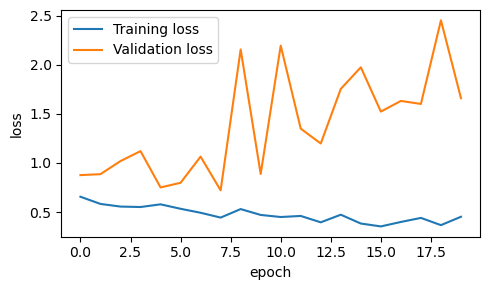

In [106]:
model_loss = pd.DataFrame(history_7.history)
model_loss['epoch'] = history_7.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["loss"], 
        label="Training loss")
ax.plot(np.arange(0, num_epochs), model_loss["val_loss"], 
        label="Validation loss")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.tight_layout()
plt.show()

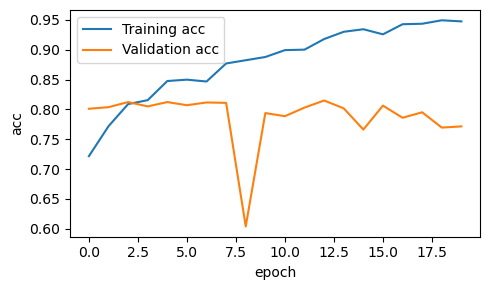

In [107]:
model_loss = pd.DataFrame(history_7.history)
model_loss['epoch'] = history_7.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["accuracy"], 
        label="Training acc")
ax.plot(np.arange(0, num_epochs), model_loss["val_accuracy"], 
        label="Validation acc")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.tight_layout()
plt.show()

In [108]:
model7.load_weights("weights7.hdf5")
model7.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [109]:
scores = model7.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 81.48%


### Lstm Model 7

In [110]:
filepath="weights8.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_8".format(time()))
callbacks_1 = [checkpoint,tensorboard_callback]

In [111]:
from tensorflow.keras.layers import (
    BatchNormalization)
from keras.layers import Bidirectional


In [112]:
embedding_vecor_length = 32
model8 = Sequential()
model8.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights = [embedding_matrix], input_length=35))
model8.add(Bidirectional(LSTM(35,return_sequences = True, recurrent_dropout=0.2)))
model8.add(LSTM(108,return_sequences=True))
model8.add(Dropout(0.5))
model8.add(LSTM(64,return_sequences=True))
model8.add(Dropout(0.5))
model8.add(LSTM(32))
model8.add(BatchNormalization())
model8.add(Dropout(0.3))
model8.add(Dense(1, activation='sigmoid'))
#model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model8.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 35, 100)           1561500   
                                                                 
 bidirectional (Bidirectiona  (None, 35, 70)           38080     
 l)                                                              
                                                                 
 lstm_9 (LSTM)               (None, 35, 108)           77328     
                                                                 
 dropout_8 (Dropout)         (None, 35, 108)           0         
                                                                 
 lstm_10 (LSTM)              (None, 35, 64)            44288     
                                                                 
 dropout_9 (Dropout)         (None, 35, 64)            0         
                                                      

In [113]:
model8.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_8 = model8.fit(X_train,
          y_train,
          batch_size=64,
          validation_data=(X_test, y_test),
          epochs=20,callbacks=[callbacks_1])

Epoch 1/20
96/96 [==============================] - ETA: 0s - loss: 0.5084 - accuracy: 0.7658
Epoch 00001: val_accuracy improved from -inf to 0.71635, saving model to weights8.hdf5
96/96 [==============================] - 26s 162ms/step - loss: 0.5084 - accuracy: 0.7658 - val_loss: 0.6210 - val_accuracy: 0.7163
Epoch 2/20
96/96 [==============================] - ETA: 0s - loss: 0.4140 - accuracy: 0.8266
Epoch 00002: val_accuracy improved from 0.71635 to 0.81090, saving model to weights8.hdf5
96/96 [==============================] - 14s 141ms/step - loss: 0.4140 - accuracy: 0.8266 - val_loss: 0.5897 - val_accuracy: 0.8109
Epoch 3/20
96/96 [==============================] - ETA: 0s - loss: 0.3502 - accuracy: 0.8591
Epoch 00003: val_accuracy did not improve from 0.81090
96/96 [==============================] - 14s 142ms/step - loss: 0.3502 - accuracy: 0.8591 - val_loss: 0.4878 - val_accuracy: 0.8076
Epoch 4/20
96/96 [==============================] - ETA: 0s - loss: 0.2629 - accuracy: 0.8

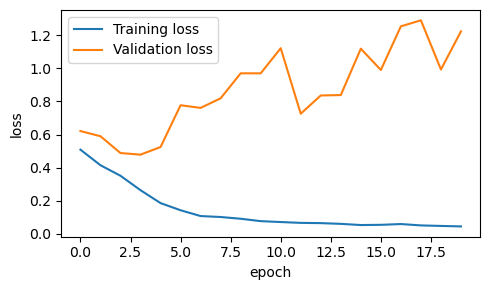

In [114]:
model_loss = pd.DataFrame(history_8.history)
model_loss['epoch'] = history_8.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["loss"], 
        label="Training loss")
ax.plot(np.arange(0, num_epochs), model_loss["val_loss"], 
        label="Validation loss")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.tight_layout()
plt.show()

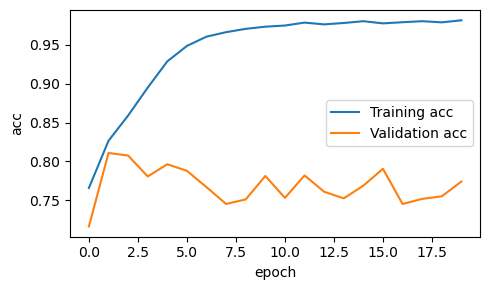

In [115]:
model_loss = pd.DataFrame(history_8.history)
model_loss['epoch'] = history_8.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["accuracy"], 
        label="Training acc")
ax.plot(np.arange(0, num_epochs), model_loss["val_accuracy"], 
        label="Validation acc")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.tight_layout()
plt.show()

In [116]:
model8.load_weights("weights8.hdf5")
model8.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [117]:
scores = model8.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 81.09%


### Lstm Model 8

In [129]:
filepath="weights9.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_9".format(time()))
callbacks_1 = [checkpoint,tensorboard_callback]

In [130]:
embedding_vecor_length = 32
model9 = Sequential()
model9.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights = [embedding_matrix], input_length=35))
model9.add(LSTM(108,return_sequences=True))
model9.add(Dropout(0.7))
model9.add(LSTM(64,return_sequences=True))
model9.add(Dropout(0.5))
model9.add(LSTM(32))
model9.add(Dropout(0.3))
model9.add(Dense(1, activation='sigmoid'))
#model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model9.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 35, 100)           1561500   
                                                                 
 lstm_18 (LSTM)              (None, 35, 108)           90288     
                                                                 
 dropout_17 (Dropout)        (None, 35, 108)           0         
                                                                 
 lstm_19 (LSTM)              (None, 35, 64)            44288     
                                                                 
 dropout_18 (Dropout)        (None, 35, 64)            0         
                                                                 
 lstm_20 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_19 (Dropout)        (None, 32)               

In [131]:
model9.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_9 = model9.fit(X_train,
          y_train,
          batch_size=64,
          validation_data=(X_test, y_test),
          epochs=15,callbacks=[callbacks_1])

Epoch 1/15
95/96 [============================>.] - ETA: 0s - loss: 0.4955 - accuracy: 0.7732
Epoch 00001: val_accuracy improved from -inf to 0.81221, saving model to weights9.hdf5
96/96 [==============================] - 18s 128ms/step - loss: 0.4951 - accuracy: 0.7736 - val_loss: 0.4356 - val_accuracy: 0.8122
Epoch 2/15
96/96 [==============================] - ETA: 0s - loss: 0.4034 - accuracy: 0.8366
Epoch 00002: val_accuracy improved from 0.81221 to 0.81681, saving model to weights9.hdf5
96/96 [==============================] - 11s 112ms/step - loss: 0.4034 - accuracy: 0.8366 - val_loss: 0.4273 - val_accuracy: 0.8168
Epoch 3/15
95/96 [============================>.] - ETA: 0s - loss: 0.3465 - accuracy: 0.8640
Epoch 00003: val_accuracy did not improve from 0.81681
96/96 [==============================] - 11s 111ms/step - loss: 0.3462 - accuracy: 0.8640 - val_loss: 0.4207 - val_accuracy: 0.8155
Epoch 4/15
95/96 [============================>.] - ETA: 0s - loss: 0.2760 - accuracy: 0.9

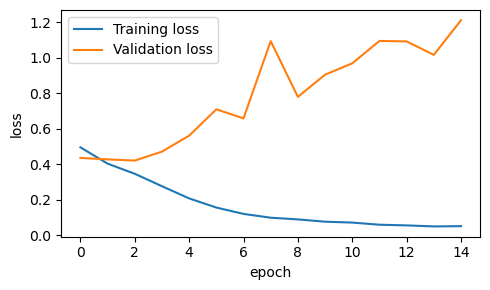

In [132]:
model_loss = pd.DataFrame(history_9.history)
model_loss['epoch'] = history_9.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["loss"], 
        label="Training loss")
ax.plot(np.arange(0, num_epochs), model_loss["val_loss"], 
        label="Validation loss")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.tight_layout()
plt.show()

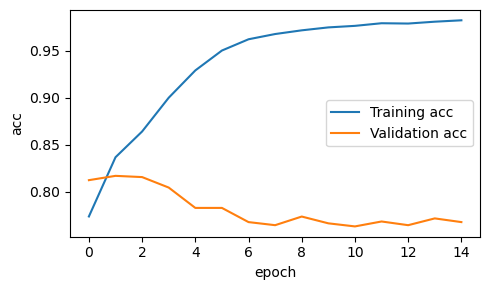

In [133]:
model_loss = pd.DataFrame(history_9.history)
model_loss['epoch'] = history_9.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["accuracy"], 
        label="Training acc")
ax.plot(np.arange(0, num_epochs), model_loss["val_accuracy"], 
        label="Validation acc")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.tight_layout()
plt.show()

In [134]:
model9.load_weights("weights9.hdf5")
model9.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [135]:
scores = model9.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 81.68%


### Lstm Model 9 Bidirectional Lstm

In [136]:
filepath="weights10.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_10".format(time()))
callbacks_1 = [checkpoint,tensorboard_callback]

In [137]:
embedding_vecor_length = 32
model10 = Sequential()
model10.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights = [embedding_matrix], input_length=35))
model10.add(Bidirectional(LSTM(35,return_sequences = True, recurrent_dropout=0.2)))
model10.add(LSTM(108,return_sequences=True))
model10.add(Dropout(0.5))
model10.add(LSTM(64,return_sequences=True))
model10.add(Dropout(0.3))
model10.add(LSTM(32))
model10.add(Dropout(0.3))
model10.add(Dense(1, activation='relu'))
print(model10.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 35, 100)           1561500   
                                                                 
 bidirectional_1 (Bidirectio  (None, 35, 70)           38080     
 nal)                                                            
                                                                 
 lstm_22 (LSTM)              (None, 35, 108)           77328     
                                                                 
 dropout_20 (Dropout)        (None, 35, 108)           0         
                                                                 
 lstm_23 (LSTM)              (None, 35, 64)            44288     
                                                                 
 dropout_21 (Dropout)        (None, 35, 64)            0         
                                                      

In [138]:
model10.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history_10 = model10.fit(X_train,
          y_train,
          batch_size=64,
          validation_data=(X_test, y_test),
          epochs=15,callbacks=[callbacks_1])

Epoch 1/15
96/96 [==============================] - ETA: 0s - loss: 0.7004 - accuracy: 0.7018
Epoch 00001: val_accuracy improved from -inf to 0.79317, saving model to weights10.hdf5
96/96 [==============================] - 27s 168ms/step - loss: 0.7004 - accuracy: 0.7018 - val_loss: 0.8201 - val_accuracy: 0.7932
Epoch 2/15
96/96 [==============================] - ETA: 0s - loss: 0.6114 - accuracy: 0.7846
Epoch 00002: val_accuracy did not improve from 0.79317
96/96 [==============================] - 14s 146ms/step - loss: 0.6114 - accuracy: 0.7846 - val_loss: 0.5259 - val_accuracy: 0.7768
Epoch 3/15
96/96 [==============================] - ETA: 0s - loss: 0.5427 - accuracy: 0.7888
Epoch 00003: val_accuracy did not improve from 0.79317
96/96 [==============================] - 13s 140ms/step - loss: 0.5427 - accuracy: 0.7888 - val_loss: 1.0425 - val_accuracy: 0.7840
Epoch 4/15
96/96 [==============================] - ETA: 0s - loss: 0.5466 - accuracy: 0.8131
Epoch 00004: val_accuracy impr

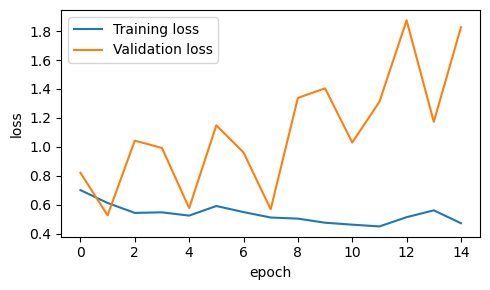

In [139]:
model_loss = pd.DataFrame(history_10.history)
model_loss['epoch'] = history_10.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["loss"], 
        label="Training loss")
ax.plot(np.arange(0, num_epochs), model_loss["val_loss"], 
        label="Validation loss")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.tight_layout()
plt.show()

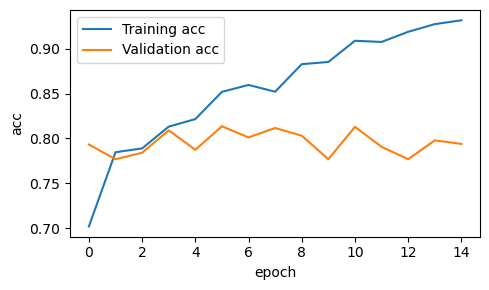

In [140]:
model_loss = pd.DataFrame(history_10.history)
model_loss['epoch'] = history_10.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["accuracy"], 
        label="Training acc")
ax.plot(np.arange(0, num_epochs), model_loss["val_accuracy"], 
        label="Validation acc")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.tight_layout()
plt.show()

In [141]:
model10.load_weights("weights10.hdf5")
model10.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [142]:
scores = model10.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 81.35%


### Lstm Model 10 Bidirectional Lstm

In [143]:
filepath="weights11.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_11".format(time()))
callbacks_1 = [checkpoint,tensorboard_callback]

In [144]:
embedding_vecor_length = 32
model11 = Sequential()
model11.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights = [embedding_matrix], input_length=35))
model11.add(Bidirectional(LSTM(35,return_sequences = True, recurrent_dropout=0.2)))
model11.add(LSTM(108,return_sequences=True))
model11.add(Dropout(0.5))
model11.add(LSTM(64,return_sequences=True))
model11.add(Dropout(0.3))
model11.add(LSTM(32))
model11.add(Dropout(0.3))
model11.add(Dense(1, activation='tanh'))
print(model11.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 35, 100)           1561500   
                                                                 
 bidirectional_2 (Bidirectio  (None, 35, 70)           38080     
 nal)                                                            
                                                                 
 lstm_26 (LSTM)              (None, 35, 108)           77328     
                                                                 
 dropout_23 (Dropout)        (None, 35, 108)           0         
                                                                 
 lstm_27 (LSTM)              (None, 35, 64)            44288     
                                                                 
 dropout_24 (Dropout)        (None, 35, 64)            0         
                                                      

In [145]:
model11.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history_11 = model11.fit(X_train,
          y_train,
          batch_size=64,
          validation_data=(X_test, y_test),
          epochs=15,callbacks=[callbacks_1])

Epoch 1/15
96/96 [==============================] - ETA: 0s - loss: 0.5805 - accuracy: 0.7363
Epoch 00001: val_accuracy improved from -inf to 0.79054, saving model to weights11.hdf5
96/96 [==============================] - 25s 154ms/step - loss: 0.5805 - accuracy: 0.7363 - val_loss: 0.7334 - val_accuracy: 0.7905
Epoch 2/15
96/96 [==============================] - ETA: 0s - loss: 0.4699 - accuracy: 0.8067
Epoch 00002: val_accuracy improved from 0.79054 to 0.79186, saving model to weights11.hdf5
96/96 [==============================] - 13s 134ms/step - loss: 0.4699 - accuracy: 0.8067 - val_loss: 0.4781 - val_accuracy: 0.7919
Epoch 3/15
96/96 [==============================] - ETA: 0s - loss: 0.4251 - accuracy: 0.8345
Epoch 00003: val_accuracy improved from 0.79186 to 0.79251, saving model to weights11.hdf5
96/96 [==============================] - 13s 134ms/step - loss: 0.4251 - accuracy: 0.8345 - val_loss: 0.4642 - val_accuracy: 0.7925
Epoch 4/15
96/96 [==============================] - 

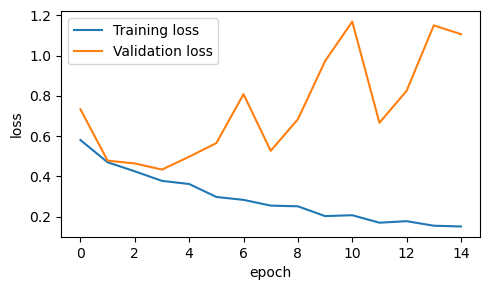

In [146]:
model_loss = pd.DataFrame(history_11.history)
model_loss['epoch'] = history_11.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["loss"], 
        label="Training loss")
ax.plot(np.arange(0, num_epochs), model_loss["val_loss"], 
        label="Validation loss")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.tight_layout()
plt.show()

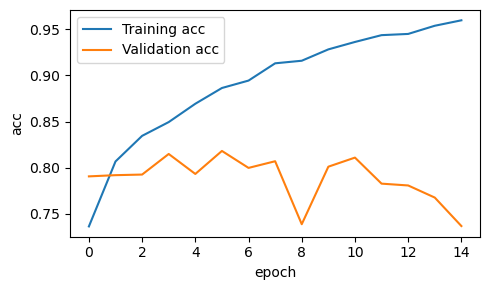

In [147]:
model_loss = pd.DataFrame(history_11.history)
model_loss['epoch'] = history_11.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["accuracy"], 
        label="Training acc")
ax.plot(np.arange(0, num_epochs), model_loss["val_accuracy"], 
        label="Validation acc")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.tight_layout()
plt.show()

In [148]:
model11.load_weights("weights11.hdf5")
model11.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [149]:
scores = model11.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 81.81%


### Lstm Model 11 Bidirectional Lstm

In [150]:
filepath="weights12.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_12".format(time()))
callbacks_1 = [checkpoint,tensorboard_callback]

In [151]:
embedding_vecor_length = 32
model12 = Sequential()
model12.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights = [embedding_matrix], input_length=35))
model12.add(Bidirectional(LSTM(35,return_sequences = True, recurrent_dropout=0.4)))
model12.add(LSTM(48,return_sequences=True))
model12.add(Dropout(0.5))
model12.add(LSTM(32))
model12.add(Dropout(0.3))
model12.add(Dense(1, activation='tanh'))
print(model12.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 35, 100)           1561500   
                                                                 
 bidirectional_3 (Bidirectio  (None, 35, 70)           38080     
 nal)                                                            
                                                                 
 lstm_30 (LSTM)              (None, 35, 48)            22848     
                                                                 
 dropout_26 (Dropout)        (None, 35, 48)            0         
                                                                 
 lstm_31 (LSTM)              (None, 32)                10368     
                                                                 
 dropout_27 (Dropout)        (None, 32)                0         
                                                      

In [152]:
model12.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history_12 = model12.fit(X_train,
          y_train,
          batch_size=64,
          validation_data=(X_test, y_test),
          epochs=15,callbacks=[callbacks_1])

Epoch 1/15
96/96 [==============================] - ETA: 0s - loss: 0.5935 - accuracy: 0.7406
Epoch 00001: val_accuracy improved from -inf to 0.77216, saving model to weights12.hdf5
96/96 [==============================] - 21s 117ms/step - loss: 0.5935 - accuracy: 0.7406 - val_loss: 0.5457 - val_accuracy: 0.7722
Epoch 2/15
96/96 [==============================] - ETA: 0s - loss: 0.4486 - accuracy: 0.8107
Epoch 00002: val_accuracy improved from 0.77216 to 0.80302, saving model to weights12.hdf5
96/96 [==============================] - 8s 89ms/step - loss: 0.4486 - accuracy: 0.8107 - val_loss: 0.4857 - val_accuracy: 0.8030
Epoch 3/15
96/96 [==============================] - ETA: 0s - loss: 0.4034 - accuracy: 0.8335
Epoch 00003: val_accuracy improved from 0.80302 to 0.81353, saving model to weights12.hdf5
96/96 [==============================] - 8s 81ms/step - loss: 0.4034 - accuracy: 0.8335 - val_loss: 0.4443 - val_accuracy: 0.8135
Epoch 4/15
96/96 [==============================] - ETA:

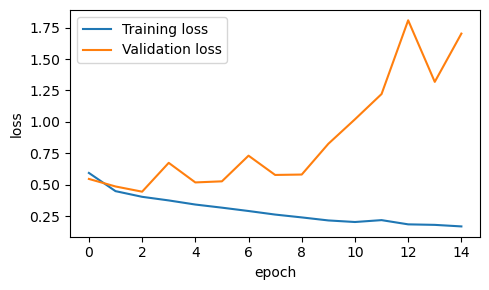

In [153]:
model_loss = pd.DataFrame(history_12.history)
model_loss['epoch'] = history_12.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["loss"], 
        label="Training loss")
ax.plot(np.arange(0, num_epochs), model_loss["val_loss"], 
        label="Validation loss")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.tight_layout()
plt.show()

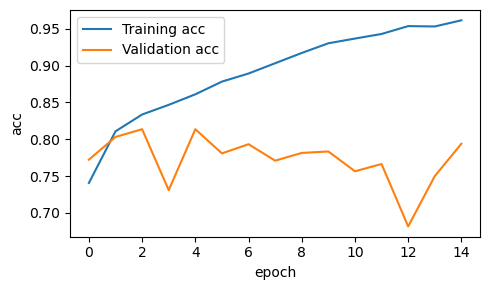

In [154]:
model_loss = pd.DataFrame(history_12.history)
model_loss['epoch'] = history_12.epoch

fig, ax = plt.subplots(1, figsize=(5,3))
num_epochs = model_loss.shape[0]

ax.plot(np.arange(0, num_epochs), model_loss["accuracy"], 
        label="Training acc")
ax.plot(np.arange(0, num_epochs), model_loss["val_accuracy"], 
        label="Validation acc")
ax.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.tight_layout()
plt.show()

In [156]:
model12.load_weights("weights12.hdf5")
model12.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [157]:
scores = model12.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 81.35%


In [4]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Layers", "Optimizer", "Activation","Dropouts","Accuracy"]
x.add_row(["100","adam","Sigmoid","-","79.78%"])
x.add_row(["108-64","adam","relu","0.5-0.3","79.97%"])
x.add_row(["108-64-32","adam","relu","0.5-0.5-0.3","78.79%"])
x.add_row(["108-64-32","RMSprop","relu","0.5-0.5-0.3","79.45%"])
x.add_row(["64-32","adam","RMSprop","0.7-0.5","79.65%"])
x.add_row(["108-64-32","Glovevector-rmsprop","relu","0.5-0.5-0.3","81.48%"])
x.add_row(["108-64-32","Glovevector-adam","Sigmoid","0.5-0.5-0.3","81.09%"])
x.add_row(["108-64-32","Glovevector-adam","Sigmoid","0.7-0.5-0.3","81.68%"])
x.add_row(["108-64-32","Glovevector-rmsprop","relu","0.5-0.5-0.3","81.35%"])
x.add_row(["108-64-32","Glovevector-rmsprop","tanh","0.5-0.5-0.3","81.81%"])
x.add_row(["48-32","Glovevector-rmsprop","tanh","0.5-0.3","81.35%"])


print(x)

+-----------+---------------------+------------+-------------+----------+
|   Layers  |      Optimizer      | Activation |   Dropouts  | Accuracy |
+-----------+---------------------+------------+-------------+----------+
|    100    |         adam        |  Sigmoid   |      -      |  79.78%  |
|   108-64  |         adam        |    relu    |   0.5-0.3   |  79.97%  |
| 108-64-32 |         adam        |    relu    | 0.5-0.5-0.3 |  78.79%  |
| 108-64-32 |       RMSprop       |    relu    | 0.5-0.5-0.3 |  79.45%  |
|   64-32   |         adam        |  RMSprop   |   0.7-0.5   |  79.65%  |
| 108-64-32 | Glovevector-rmsprop |    relu    | 0.5-0.5-0.3 |  81.48%  |
| 108-64-32 |   Glovevector-adam  |  Sigmoid   | 0.5-0.5-0.3 |  81.09%  |
| 108-64-32 |   Glovevector-adam  |  Sigmoid   | 0.7-0.5-0.3 |  81.68%  |
| 108-64-32 | Glovevector-rmsprop |    relu    | 0.5-0.5-0.3 |  81.35%  |
| 108-64-32 | Glovevector-rmsprop |    tanh    | 0.5-0.5-0.3 |  81.81%  |
|   48-32   | Glovevector-rmsprop |   